<a href="https://colab.research.google.com/github/Matlup45/Text-Analysis/blob/main/Cleantech_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

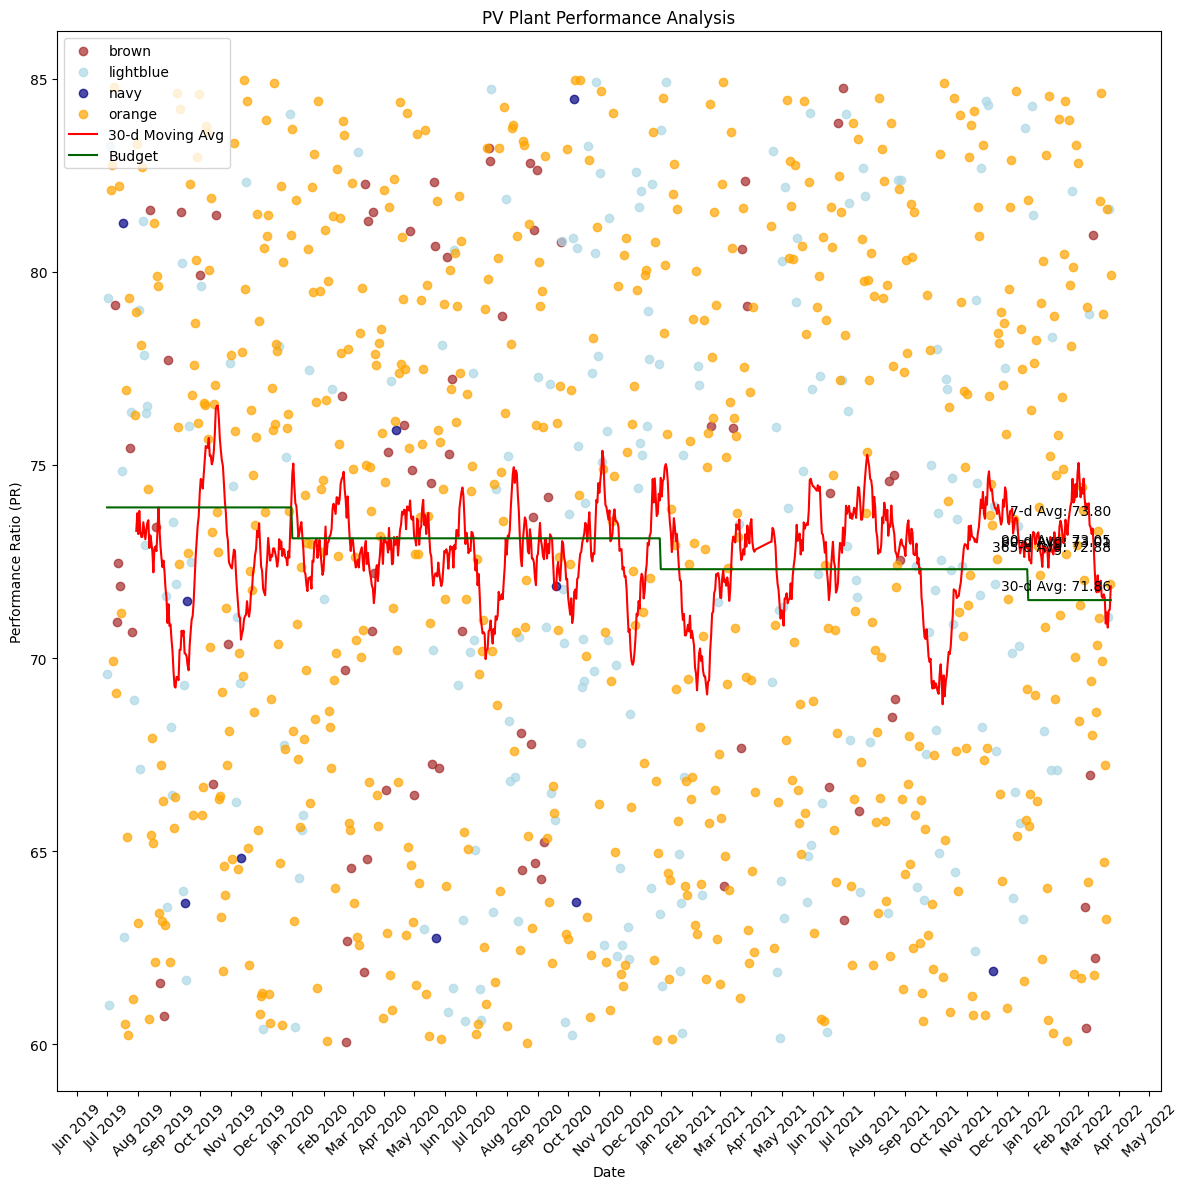

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# Load the dataset from Excel
data = pd.read_excel('/content/Assignment_Dataset.xlsx')

# Calculate moving averages
data['30d_MA'] = data['PR'].rolling(window=30).mean()

# Calculate budget values dynamically
start_year = data['Date'].min().year
current_year = data['Date'].max().year
budget_values = [73.9 - (i * 0.8) for i in range(current_year - start_year + 1)]
data['Budget'] = data['Date'].apply(lambda x: budget_values[x.year - start_year] if x.year - start_year < len(budget_values) else None)

# Define color-coding based on GHI values
def color_mapping(ghi):
    if ghi < 2:
        return 'navy'
    elif 2 <= ghi < 4:
        return 'lightblue'
    elif 4 <= ghi < 6:
        return 'orange'
    else:
        return 'brown'

data['Color'] = data['GHI'].apply(color_mapping)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Scatter plot with color-coded points
for color, df in data.groupby('Color'):
    ax.scatter(df['Date'], df['PR'], color=color, label=color, alpha=0.7)

ax.plot(data['Date'], data['30d_MA'], color='red', label='30-d Moving Avg')
ax.plot(data['Date'], data['Budget'], color='darkgreen', label='Budget')

# Format x-axis dates
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)

# Calculate and display average PR for different time windows
time_windows = [7, 30, 60, 90, 365]
for window in time_windows:
    data[f'{window}-d_Avg'] = data['PR'].rolling(window=window).mean()
    avg = data[f'{window}-d_Avg'].iloc[-1]
    plt.text(data['Date'].iloc[-1], avg, f'{window}-d Avg: {avg:.2f}', va='center', ha='right')

ax.set_xlabel('Date')
ax.set_ylabel('Performance Ratio (PR)')
ax.set_title('PV Plant Performance Analysis')
ax.legend()

plt.tight_layout()
plt.show()


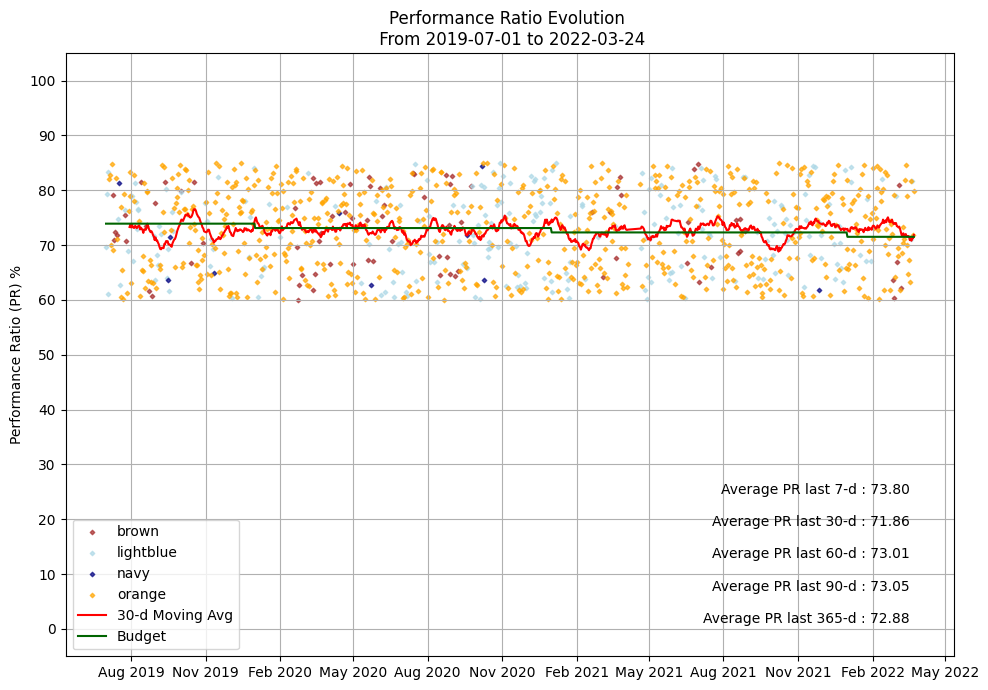

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from matplotlib.ticker import MultipleLocator

# Load the dataset from Excel
data = pd.read_excel('/content/Assignment_Dataset.xlsx')

# Calculate moving averages
data['30d_MA'] = data['PR'].rolling(window=30).mean()

# Calculate budget values dynamically
start_year = data['Date'].min().year
current_year = data['Date'].max().year
budget_values = [73.9 - (i * 0.8) for i in range(current_year - start_year + 1)]
data['Budget'] = data['Date'].apply(lambda x: budget_values[x.year - start_year] if x.year - start_year < len(budget_values) else None)

# Define color-coding based on GHI values
def color_mapping(ghi):
    if ghi < 2:
        return 'navy'
    elif 2 <= ghi < 4:
        return 'lightblue'
    elif 4 <= ghi < 6:
        return 'orange'
    else:
        return 'brown'

data['Color'] = data['GHI'].apply(color_mapping)

starting_date = data['Date'].min().strftime('%Y-%m-%d')
last_date = data['Date'].max().strftime('%Y-%m-%d')


# Plotting
fig, ax = plt.subplots(figsize=(10, 7))


# Scatter plot with color-coded points and smaller markers
for color, df in data.groupby('Color'):
    ax.scatter(df['Date'], df['PR'], color=color, label=color, marker='D', alpha=0.7, s=5)

ax.plot(data['Date'], data['30d_MA'], color='red', label='30-d Moving Avg')
ax.plot(data['Date'], data['Budget'], color='darkgreen', label='Budget')

ax.legend(loc='center')

# Format x-axis dates
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Set y-axis range to 0-100 and adjust ticks
ax.set_ylim(-5, 105)
ax.yaxis.set_major_locator(MultipleLocator(10))  # Set y-axis tick interval to 10

# Calculate and display average PR for different time windows
time_windows = [7, 30, 60, 90, 365]
for window in time_windows:
    data[f'{window}d_Avg'] = data['PR'].rolling(window=window).mean()
    avg = data[f'{window}d_Avg'].iloc[-1]

# Display time window averages in the bottom right corner
bottom_right_text = '\n\n'.join([f'Average PR last {window}-d : {data[f"{window}d_Avg"].iloc[-1]:.2f}' for window in time_windows])
plt.text(0.95, 0.05, bottom_right_text, transform=ax.transAxes, va='bottom', ha='right')

ax.set_ylabel('Performance Ratio (PR) %')
ax.set_title(f'Performance Ratio Evolution \n From {starting_date} to {last_date}')
ax.legend()

# Add grid
ax.grid(True)

plt.tight_layout()
plt.show()


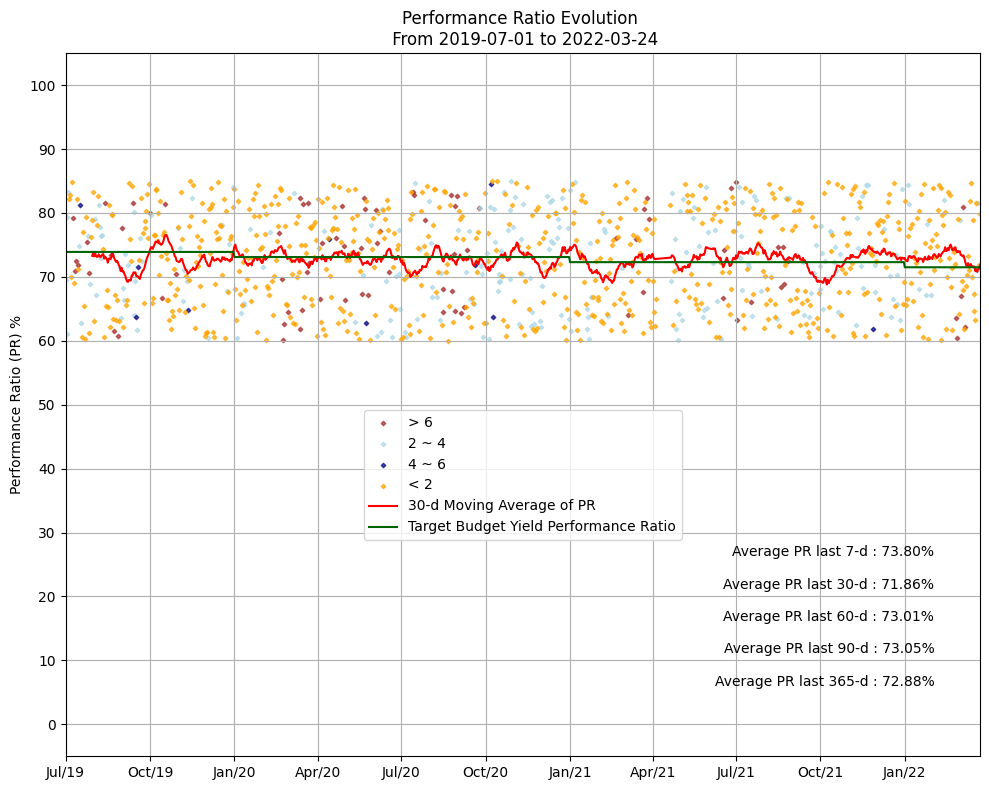

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator

# Importing Dataset
data = pd.read_excel('/content/Assignment_Dataset.xlsx')

# Calculate moving averages
data['30d_MA'] = data['PR'].rolling(window=30).mean()

# Calculating budget values
start_year = data['Date'].min().year
current_year = data['Date'].max().year
budget_values = [73.9 - (i * 0.8) for i in range(current_year - start_year + 1)]
data['Budget'] = data['Date'].apply(lambda x: budget_values[x.year - start_year] if x.year - start_year < len(budget_values) else None)

# Define color-coding based on GHI values
def color_mapping(ghi):
    if ghi < 2:
        return 'navy'
    elif 2 <= ghi < 4:
        return 'lightblue'
    elif 4 <= ghi < 6:
        return 'orange'
    else:
        return 'brown'

data['Color'] = data['GHI'].apply(color_mapping)

starting_date = data['Date'].min().strftime('%Y-%m-%d')
last_date = data['Date'].max().strftime('%Y-%m-%d')

# Frame size
fig, ax = plt.subplots(figsize=(10, 8))

# Scatter plot Color schemes
for color, df in data.groupby('Color'):
    ax.scatter(df['Date'], df['PR'], color=color, label=color, marker='D', alpha=0.7, s=5)

ax.plot(data['Date'], data['30d_MA'], color='red', label='30-d Moving Avg')
ax.plot(data['Date'], data['Budget'], color='darkgreen', label='Budget')


# Axis Marking (X,Y-axis)
ax.yaxis.set_major_locator(MultipleLocator(10))
ax.set_ylim(-5, 105)

# Formatting x-axis dates
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b''/''%y'))

# Calculating and display average PR for different time windows
time_windows = [7, 30, 60, 90, 365]
for window in time_windows:
    data[f'{window}d_Avg'] = data['PR'].rolling(window=window).mean()
    avg = data[f'{window}d_Avg'].iloc[-1]

bottom_right_text = ''
for window in time_windows:
    avg = data[f'{window}d_Avg'].iloc[-1]
    bottom_right_text += f'Average PR last {window}-d : {avg:.2f}%\n\n'

plt.text(0.95, 0.05, bottom_right_text, transform=ax.transAxes, va='bottom', ha='right')

# Labeling the graph
ax.set_xlim(data['Date'].iloc[0], data['Date'].max())
ax.set_ylabel('Performance Ratio (PR) %')
ax.set_title(f'Performance Ratio Evolution \n From {starting_date} to {last_date}')


# Locating the Legend Box
ax.legend(loc='center',bbox_to_anchor=(0.5,0.4),
          labels=['> 6','2 ~ 4', '4 ~ 6','< 2','30-d Moving Average of PR', 'Target Budget Yield Performance Ratio'])

ax.grid(True)
plt.tight_layout()
plt.show()
